In [1]:
import pandas as pd   

In [2]:
df=pd.read_csv("SeoulBikeData.csv")


In [36]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
df["Rainfall(mm)"].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

In [5]:
df["Rainfall(mm)"].value_counts()

Rainfall(mm)
0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: count, Length: 61, dtype: int64

In [6]:
# Split into rainfall and no rainfall data
rainfall_data = df[df["Rainfall(mm)"] != 0.]
no_rainfall_data = df[df["Rainfall(mm)"] == 0]

In [7]:
rainfall_data.shape

(528, 14)

In [8]:
no_rainfall_data.shape   

(8232, 14)

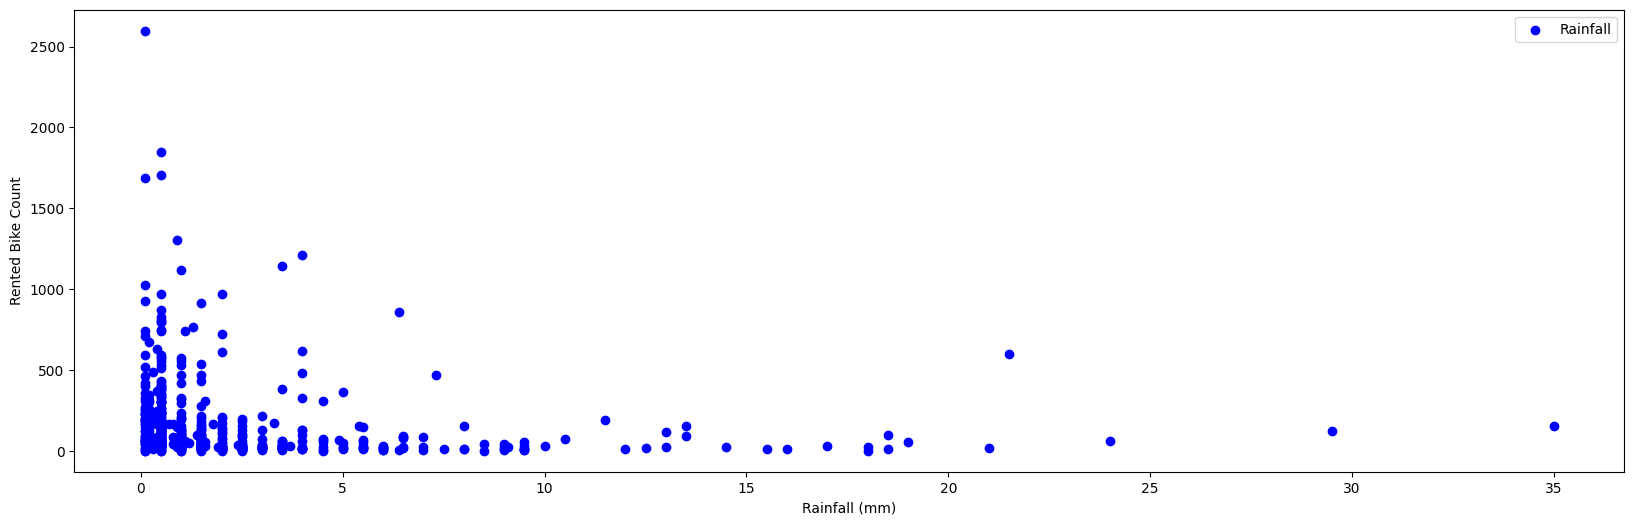

In [9]:
# Plot the rainfall vs bike count
import matplotlib.pyplot as plt

#increase the size of the plot
plt.figure(figsize=(20,6))

plt.scatter(rainfall_data["Rainfall(mm)"], rainfall_data["Rented Bike Count"], color='blue', label='Rainfall')

plt.xlabel("Rainfall (mm)")
plt.ylabel("Rented Bike Count")
plt.legend()
plt.show()

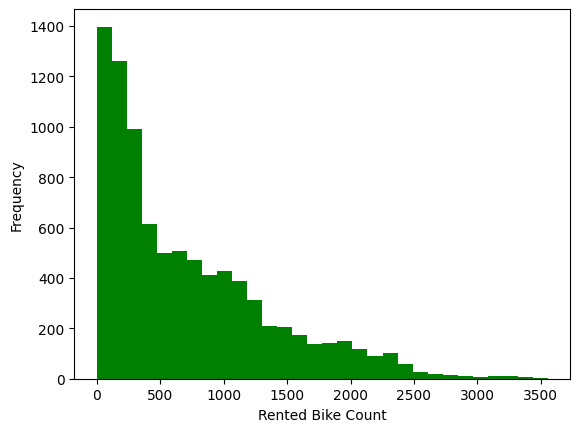

In [10]:
# Visualize the distribution of the bike count
plt.hist(df["Rented Bike Count"], bins=30, color='green')
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

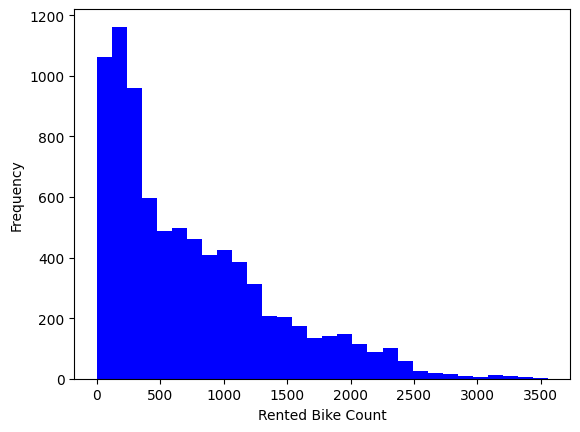

In [11]:
# Visualize the distribution of the non zero rainfall data
plt.hist(no_rainfall_data["Rented Bike Count"], bins=30, color='blue')
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

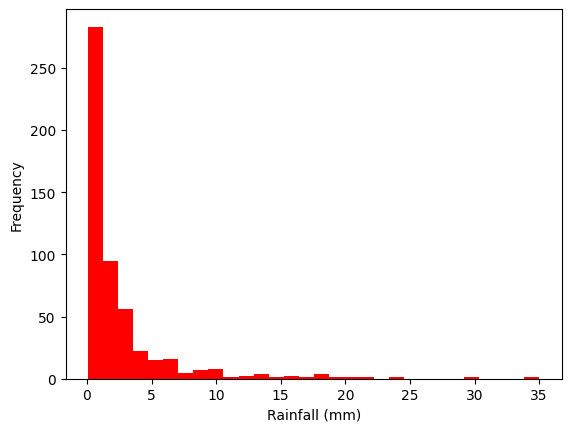

In [12]:
# plot rainfall histogram of non zero rainfall data
plt.hist(rainfall_data["Rainfall(mm)"], bins=30, color='red')
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

In [13]:
import seaborn as sns

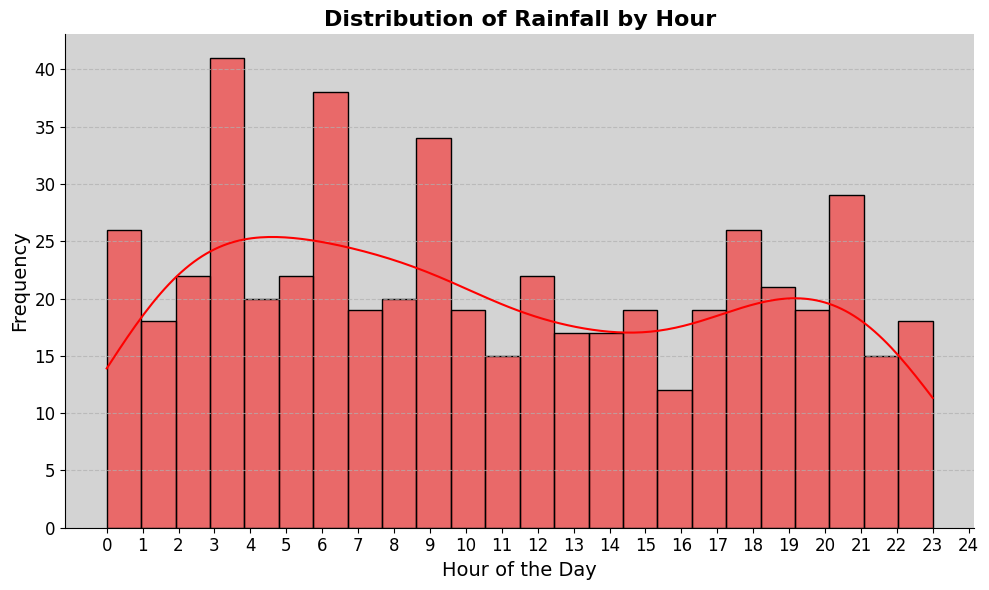

In [14]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(rainfall_data["Hour"], bins=24, color='red', kde=True, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Rainfall by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(ticks=range(0, 25), fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the color and style
plt.gca().patch.set_facecolor('lightgrey')  # Background color of the plot area
plt.gca().spines['top'].set_visible(False)   # Remove top spine
plt.gca().spines['right'].set_visible(False) # Remove right spine

# Show the plot
plt.tight_layout()
plt.show()

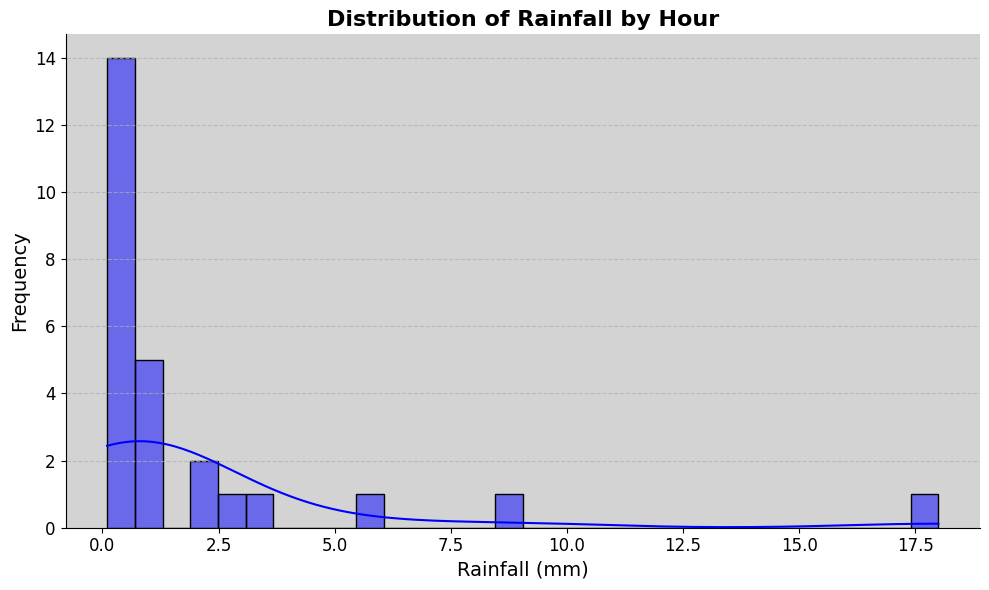

In [15]:
# separate data points with hour == 0 and rainfall > 0
rainfall_data_hour_0 = rainfall_data[rainfall_data["Hour"] == 0]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(rainfall_data_hour_0["Rainfall(mm)"], bins=30, color='blue', kde=True, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Rainfall by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the color and style
plt.gca().patch.set_facecolor('lightgrey')  # Background color of the plot area
plt.gca().spines['top'].set_visible(False)   # Remove top spine
plt.gca().spines['right'].set_visible(False) # Remove right spine

# Show the plot
plt.tight_layout()
plt.show()


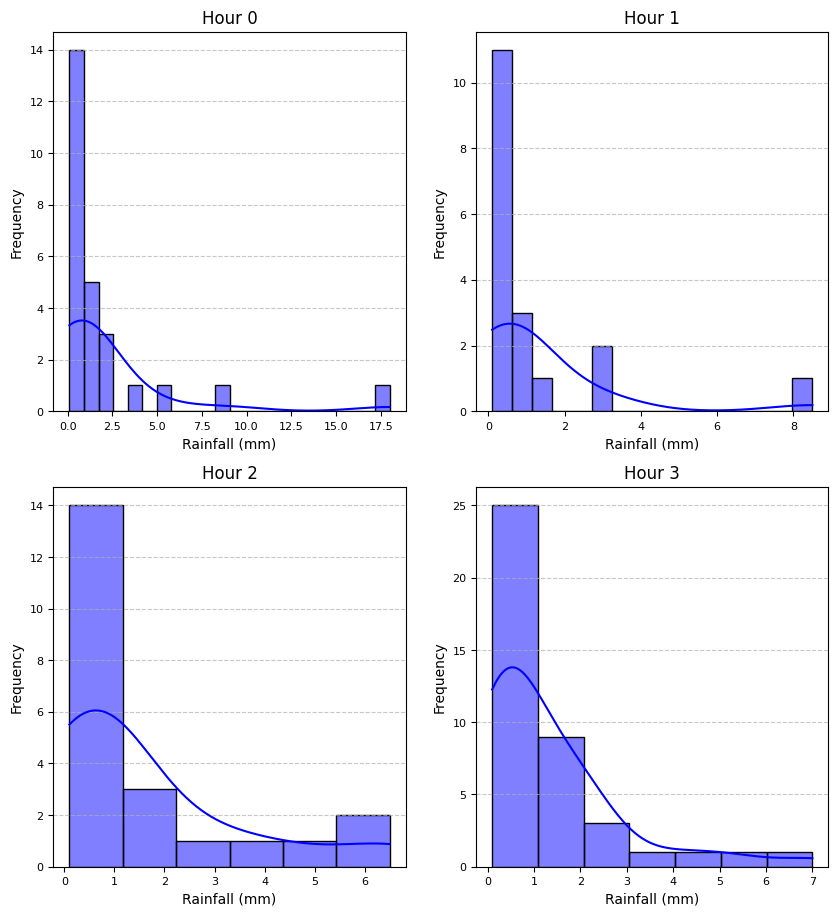

In [16]:
# plot the above plot for separately for 0-23 hours in 1 plot
plt.figure(figsize=(10, 70))

# 12 rows and 2 columns

for i in range(4):
    plt.subplot(12, 2, i+1)
    sns.histplot(rainfall_data[rainfall_data["Hour"] == i]["Rainfall(mm)"], color='blue', kde=True, edgecolor='black')
    plt.title(f'Hour {i}', fontsize=12)
    plt.xlabel('Rainfall (mm)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)


In [17]:
# Identify the four quartiles in above histogram
rainfall_data["Hour"].describe()


count    528.000000
mean      10.757576
std        6.980179
min        0.000000
25%        5.000000
50%       10.000000
75%       17.000000
max       23.000000
Name: Hour, dtype: float64

In [18]:
rainfall_data["Rainfall(mm)"].describe()

count    528.000000
mean       2.466856
std        3.927524
min        0.100000
25%        0.500000
50%        1.000000
75%        2.500000
max       35.000000
Name: Rainfall(mm), dtype: float64

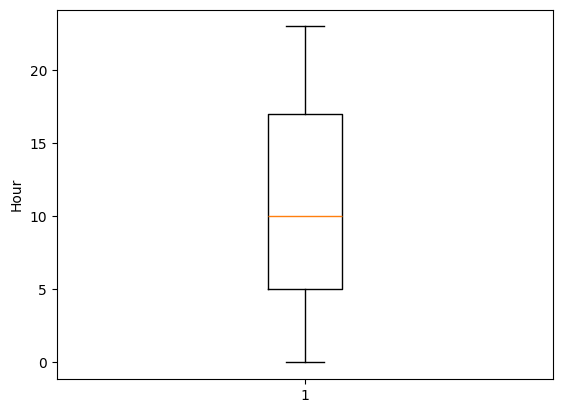

In [19]:
# Box plot of above data
plt.boxplot(rainfall_data["Hour"])
plt.ylabel("Hour")
plt.show()

In [20]:
import numpy as np

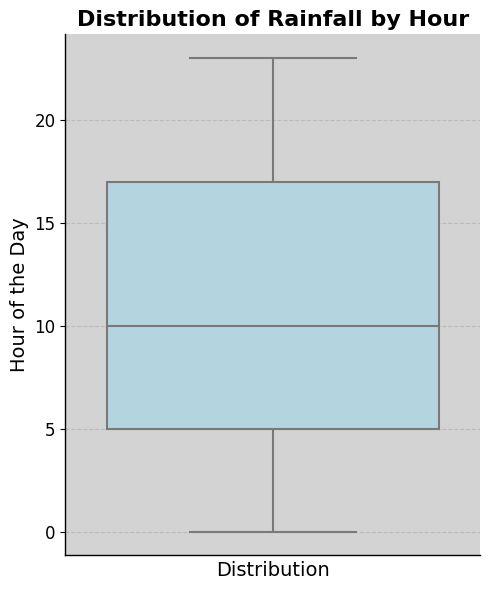

In [21]:
# Create the box plot
plt.figure(figsize=(5, 6))
sns.boxplot(y=rainfall_data["Hour"], color='lightblue', linewidth=1.5, fliersize=8, 
            flierprops=dict(markerfacecolor='red', marker='o'))

# Add titles and labels
plt.title('Distribution of Rainfall by Hour', fontsize=16, fontweight='bold')
plt.ylabel('Hour of the Day', fontsize=14)
plt.xlabel('Distribution', fontsize=14)

# Customize ticks
plt.yticks(fontsize=12)
plt.xticks([])  # Hides x-axis ticks as they're not necessary for a vertical box plot

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the color and style
plt.gca().patch.set_facecolor('lightgrey')  # Background color of the plot area
plt.gca().spines['top'].set_visible(False)   # Remove top spine
plt.gca().spines['right'].set_visible(False) # Remove right spine
plt.gca().spines['left'].set_linewidth(1)    # Make left spine thicker
plt.gca().spines['bottom'].set_linewidth(1)  # Make bottom spine thicker

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# Separate the data into 4 Quartiles
q1=5
q2=10
q3=17

rainfall_Q1=rainfall_data[rainfall_data["Hour"]<=q1]
rainfall_Q2=rainfall_data[(rainfall_data["Hour"]>q1) & (rainfall_data["Hour"]<=q2)]
rainfall_Q3=rainfall_data[(rainfall_data["Hour"]>q2) & (rainfall_data["Hour"]<=q3)]
rainfall_Q4=rainfall_data[rainfall_data["Hour"]>q3]

In [23]:
print("Number of data points in Q1: ", rainfall_Q1.shape[0])
print("Number of data points in Q2: ", rainfall_Q2.shape[0])
print("Number of data points in Q3: ", rainfall_Q3.shape[0])
print("Number of data points in Q4: ", rainfall_Q4.shape[0])

Number of data points in Q1:  149
Number of data points in Q2:  130
Number of data points in Q3:  121
Number of data points in Q4:  128


In [24]:
# Now we need to apply 1 way anova on above 4 samples from scratch

samples = 4
DOF = 0

for sample in [rainfall_Q1, rainfall_Q2, rainfall_Q3, rainfall_Q4]:
    DOF += sample.shape[0] - 1
    
print("Degrees of Freedom: ", DOF)

Degrees of Freedom:  524


In [25]:
mean1= rainfall_Q1["Rented Bike Count"].mean()
mean2= rainfall_Q2["Rented Bike Count"].mean()
mean3= rainfall_Q3["Rented Bike Count"].mean()
mean4= rainfall_Q4["Rented Bike Count"].mean()

print("Mean of Q1: ", mean1)
print("Mean of Q2: ", mean2)
print("Mean of Q3: ", mean3)
print("Mean of Q4: ", mean4)

Mean of Q1:  98.32214765100672
Mean of Q2:  160.3
Mean of Q3:  180.9917355371901
Mean of Q4:  225.90625


In [26]:
SS_W = 0

SS_W += ((rainfall_Q1["Rented Bike Count"] - mean1)**2).sum()
SS_W += ((rainfall_Q2["Rented Bike Count"] - mean2)**2).sum()
SS_W += ((rainfall_Q3["Rented Bike Count"] - mean3)**2).sum()
SS_W += ((rainfall_Q4["Rented Bike Count"] - mean4)**2).sum()

print("Sum of Squares Within: ", SS_W)

Sum of Squares Within:  35025147.70364829


In [27]:
n1 = rainfall_Q1.shape[0]
n2 = rainfall_Q2.shape[0]
n3 = rainfall_Q3.shape[0]
n4 = rainfall_Q4.shape[0]


SS_b = 0
meanT = mean1 + mean2 + mean3 + mean4
meant = meanT/4

SS_b += n1 * (mean1 - meant)**2
SS_b += n2 * (mean2 - meant)**2
SS_b += n3 * (mean3 - meant)**2
SS_b += n4 * (mean4 - meant)**2

print("Sum of Squares Between: ", SS_b)

Sum of Squares Between:  1174340.3223496105


In [28]:
# Test statistic
MS_b = SS_b / (samples - 1)
MS_w = SS_W / DOF

F = MS_b / MS_w

print("T-Statistic: ", F)

T-Statistic:  5.856309625660759


In [29]:
# Critical value for alpha=0.05
from scipy.stats import f

alpha = 0.05
dfn = samples - 1
dfd = DOF

critical_value = f.ppf(1 - alpha, dfn, dfd)

print("Critical Value: ", critical_value)

Critical Value:  2.6219151180479647


In [30]:
# Clearly, F > critical value, so we reject the null hypothesis

In [31]:
# Calculate the p-value
p_value = 1 - f.cdf(F, dfn, dfd)

print("P-Value: ", p_value)

P-Value:  0.0006139046430908568


In [32]:
# Do the above test using python library
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(rainfall_Q1["Rented Bike Count"], rainfall_Q2["Rented Bike Count"], rainfall_Q3["Rented Bike Count"], rainfall_Q4["Rented Bike Count"])

print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

F-Statistic:  5.833803638102595
P-Value:  0.0006332283214841557


In [33]:
print("T-Statistic calculated from scratch: ", F)
print("P-Value calculated from scratch: ", p_value)

print("T-Statistic calculated from scipy library: ", f_statistic)
print("P-Value calculated from scipy library: ", p_value)

T-Statistic calculated from scratch:  5.856309625660759
P-Value calculated from scratch:  0.0006332283214841557
T-Statistic calculated from scipy library:  5.833803638102595
P-Value calculated from scipy library:  0.0006332283214841557


In [34]:
rainfall_data.head(20)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
51,03/12/17,117,3,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes
54,03/12/17,13,6,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes
57,03/12/17,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes
78,04/12/17,200,6,1.2,76,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes
120,06/12/17,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes
123,06/12/17,78,3,-3.2,78,0.0,1808,-6.4,0.00,0.2,0.4,Winter,No Holiday,Yes
138,06/12/17,204,18,1.7,90,1.0,66,0.2,0.00,0.3,0.3,Winter,No Holiday,Yes
141,06/12/17,165,21,1.1,92,0.5,235,0.0,0.00,0.7,1.0,Winter,No Holiday,Yes
222,10/12/17,9,6,-0.5,90,0.9,91,-1.9,0.00,2.5,2.7,Winter,No Holiday,Yes
225,10/12/17,31,9,0.2,90,1.0,305,-1.2,0.00,1.6,4.3,Winter,No Holiday,Yes


/tmp/ipykernel_597658/2180384850.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rainfall_data["Date"] = pd.to_datetime(rainfall_data["Date"])
/tmp/ipykernel_597658/2180384850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data["Date"] = pd.to_datetime(rainfall_data["Date"])


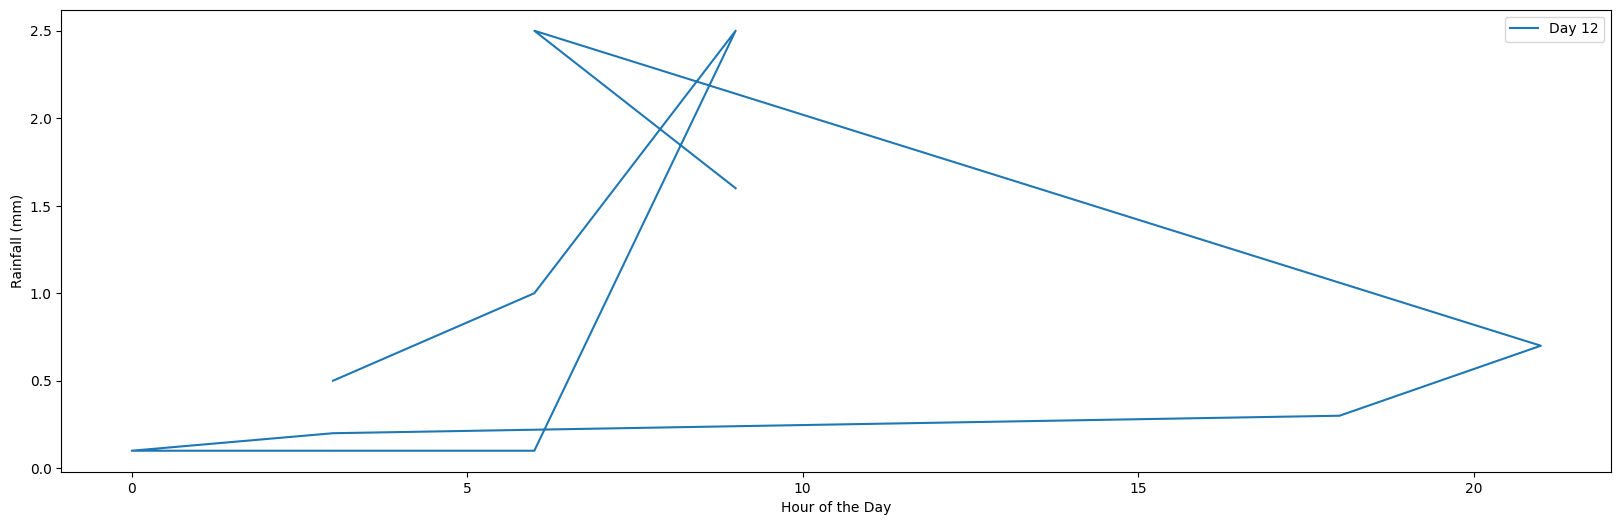

In [35]:
# plot rainfall vs hour of above data as a time series per day  
rainfall_data["Date"] = pd.to_datetime(rainfall_data["Date"])

rainfall_data["Date"].dt.day.unique()


# Create the time series plot
plt.figure(figsize=(20, 6))

i = 0
for day in rainfall_data["Date"].dt.day.unique():
    
    if(i == 1):
        break
    day_data = rainfall_data[rainfall_data["Date"].dt.day == day]
    plt.plot(day_data["Hour"], day_data["Rainfall(mm)"], label=f"Day {day}")
    
    i += 1
    
plt.xlabel("Hour of the Day")

plt.ylabel("Rainfall (mm)")

plt.legend()

plt.show()